In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
methods = ["Transpose", "Pseudoinverse", "DLS"]
trials = [10, 20, 30, 40, 50]

# Trial by Method, recorded from previous runs
iterations = np.array([[ 601,  236,  242,],
 [ 932,  218,  273.],
 [1165,  304,  300.],
 [1399,  320,  323.],
 [1560,  347,  347.]])

avg_errors = np.array([[0.0075453,  0.0185824,  0.01659668],
 [0.00668652, 0.08620312, 0.01676381],
 [0.00632133, 0.02107487, 0.01758885],
 [0.00659449, 0.0227557,  0.01676777],
 [0.00634295, 0.06644525, 0.01515416]])

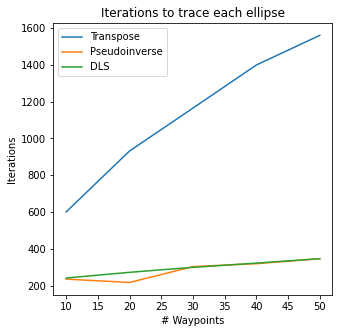

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(trials, iterations[:, 0], label="Transpose")
ax.plot(trials, iterations[:, 1], label="Pseudoinverse")
ax.plot(trials, iterations[:, 2], label="DLS")

ax.set_title("Iterations to trace each ellipse")
ax.set_xlabel("# Waypoints")
ax.set_ylabel("Iterations")

plt.legend()
plt.show()

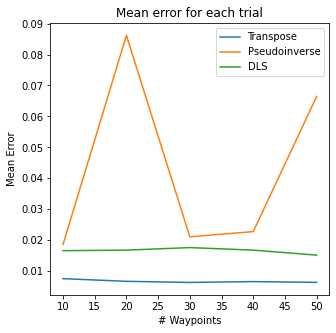

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(trials, avg_errors[:, 0], label="Transpose")
ax.plot(trials, avg_errors[:, 1], label="Pseudoinverse")
ax.plot(trials, avg_errors[:, 2], label="DLS")

ax.set_title("Mean error for each trial")
ax.set_xlabel("# Waypoints")
ax.set_ylabel("Mean Error")

plt.legend()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Webots import *

c:\Python39\lib\site-packages\spatialmath\base\transforms3d.py:1240: RuntimeWarning: divide by zero encountered in true_divide
  skw = (R - R.T) / 2 / math.sin(theta)
c:\Python39\lib\site-packages\spatialmath\base\transforms3d.py:1240: RuntimeWarning: invalid value encountered in true_divide
  skw = (R - R.T) / 2 / math.sin(theta)
c:\Python39\lib\site-packages\spatialmath\base\transforms3d.py:1244: RuntimeWarning: invalid value encountered in multiply
  return skw * theta


In [4]:
# number of different runs
print(len(end_effector_positions))
# number of intermediate positions
print(len(end_effector_positions[0]))
# number of coordinates (x, y, z
print(len(end_effector_positions[0][0]))
# waypoints
print(len(waypoints))

3
1558
3
50


In [3]:
transpose_positions = end_effector_positions[0]
pesudoinverse_positions = end_effector_positions[1]
dls_positions = end_effector_positions[2]

In [4]:
def create_ellipse_plot(positions, waypoints):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(positions[:, 1], positions[:, 2])
    ax.scatter(waypoints[:, 1], waypoints[:, 2])
    ax.set_xlabel("$y$")
    ax.set_ylabel("$z$")

    ax.set_title("The $(y, z)$ position of the end effector while tracing waypoints on an ellipse")


    plt.show()

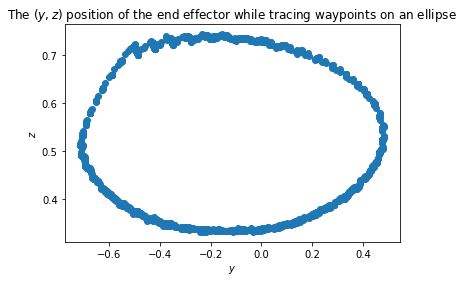

In [5]:
create_ellipse_plot(np.array(transpose_positions))

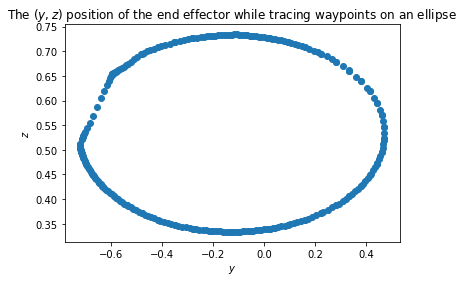

In [6]:
create_ellipse_plot(np.array(pesudoinverse_positions))

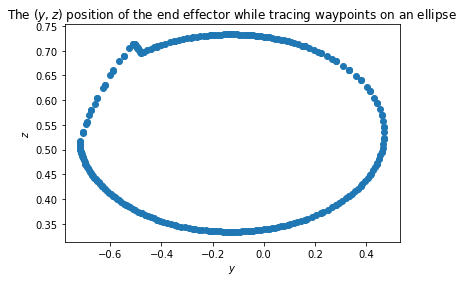

In [7]:
create_ellipse_plot(np.array(dls_positions))

In [9]:
i = 0
while robot.step(timestep) != -1:
    position = positions[i]
    [motor.setPosition(angle) for motor, angle in zip(joint_motors, position)]

    i += 1
    if i == len(positions):
        break
